In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df_taxi_train = pd.read_csv('/content/gdrive/My Drive/BDAProj/train.csv')
df_taxi_test = pd.read_csv('/content/gdrive/My Drive/BDAProj/test.csv')
df_collisions = pd.read_csv('/content/gdrive/My Drive/BDAProj/NYPD_Motor_Vehicle_Collisions.csv', index_col='UNIQUE KEY', 
                         parse_dates={'DATETIME':["DATE","TIME"]})

In [4]:
df_taxi_train.shape

(1458644, 11)

In [5]:
df_taxi_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [0]:
#remove rows with no passengers
df_taxi_train = df_taxi_train.loc[df_taxi_train['passenger_count'] != 0]
df_taxi_test = df_taxi_test.loc[df_taxi_test['passenger_count'] != 0]

In [0]:
#remove rows with durations more than 12 hours
df_taxi_train = df_taxi_train.loc[df_taxi_train['trip_duration'] <= 86400]

In [0]:
#change to datetime object
df_taxi_train['pickup_datetime'] = pd.to_datetime(df_taxi_train['pickup_datetime'])
df_taxi_train['dropoff_datetime'] = pd.to_datetime(df_taxi_train['dropoff_datetime'])
df_taxi_test['pickup_datetime'] = pd.to_datetime(df_taxi_test['pickup_datetime'])

In [9]:
df_taxi_train.sort_values(by=['trip_duration']).tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1360439,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,N,86385
59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,86387
73816,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,N,86390
295382,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


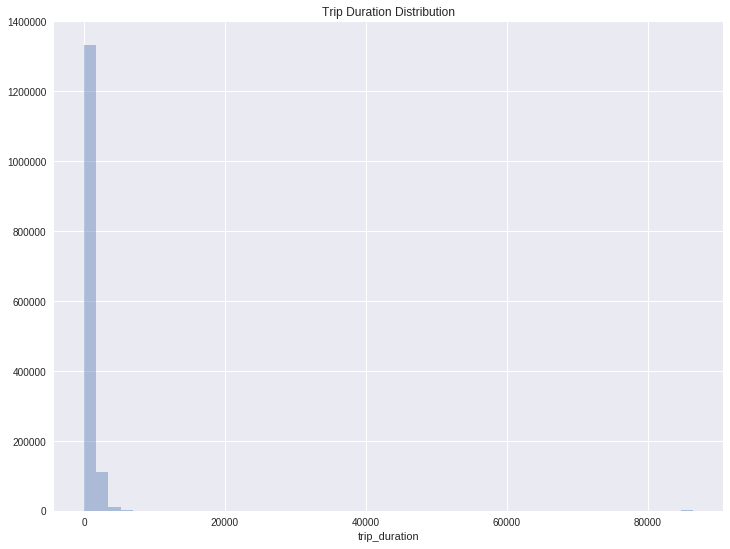

In [10]:
#trip duration distribution
fig, ax = plt.subplots(figsize=(12, 9))
sns.distplot(df_taxi_train['trip_duration'], ax=ax, kde=False)
plt.title('Trip Duration Distribution');

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


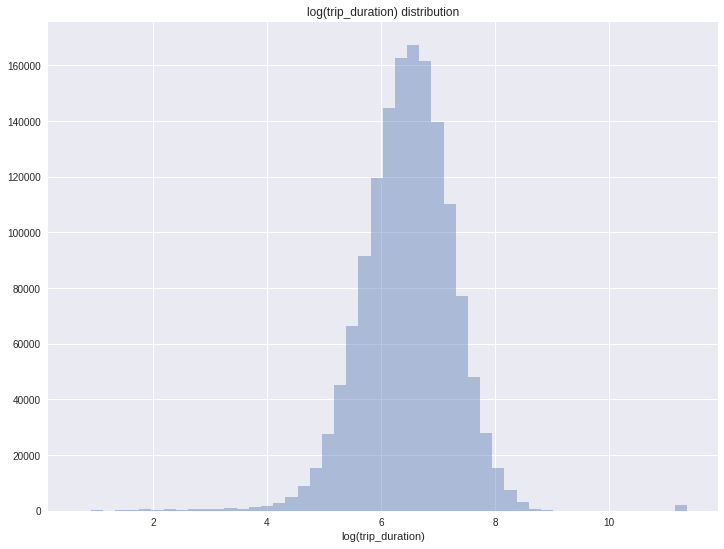

In [11]:
#trip log duration distribution
fig, ax = plt.subplots(figsize=(12, 9))
sns.distplot(np.log(df_taxi_train['trip_duration'] + 1),
             ax=ax,
             axlabel='log(trip_duration)',
             kde=False)
plt.title('log(trip_duration) distribution');

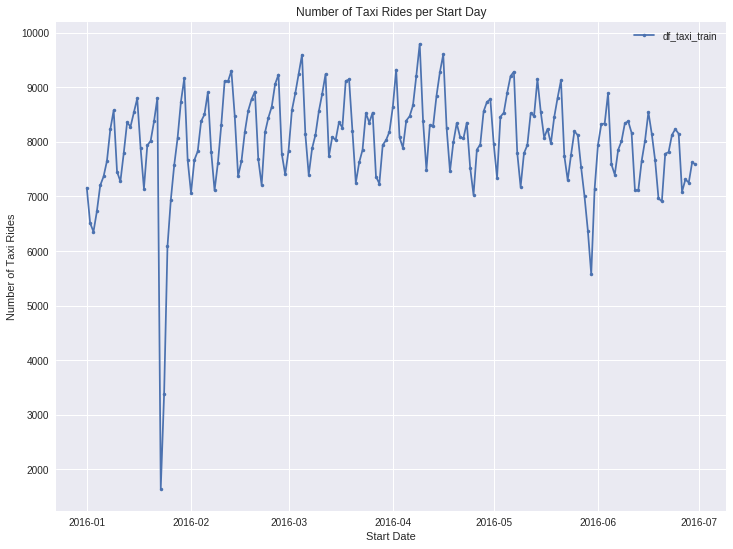

In [12]:
#number taxi ride per day
plt.figure(figsize=(12, 9))

# Make a temporary copy of our datasets
tmp_train = df_taxi_train.copy()
tmp_train['date'] = tmp_train['pickup_datetime'].dt.date
tmp_train = tmp_train.groupby('date').count()['pickup_longitude']

# Plot the temporal overlap
plt.plot(tmp_train, '.-', label='df_taxi_train')
plt.title('Number of Taxi Rides per Start Day')
plt.xlabel("Start Date")
plt.legend()
plt.ylabel('Number of Taxi Rides');

In [0]:
#adding time columns to df breaking down the datetime 
def add_time_columns(df):
    """
    Add temporal features to df
    """
    df.is_copy = False 
    df.loc[:, 'month'] = df['pickup_datetime'].dt.month
    df.loc[:, 'week_of_year'] = df['pickup_datetime'].dt.weekofyear
    df.loc[:, 'day_of_month'] = df['pickup_datetime'].dt.day
    df.loc[:, 'day_of_week'] = df['pickup_datetime'].dt.dayofweek
    df.loc[:, 'hour'] = df['pickup_datetime'].dt.hour
    df.loc[:, 'week_hour'] = df['pickup_datetime'].dt.weekday * 24 + df['hour']
    return df

In [0]:
#add time columns to our dataset
df_taxi_train = add_time_columns(df_taxi_train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


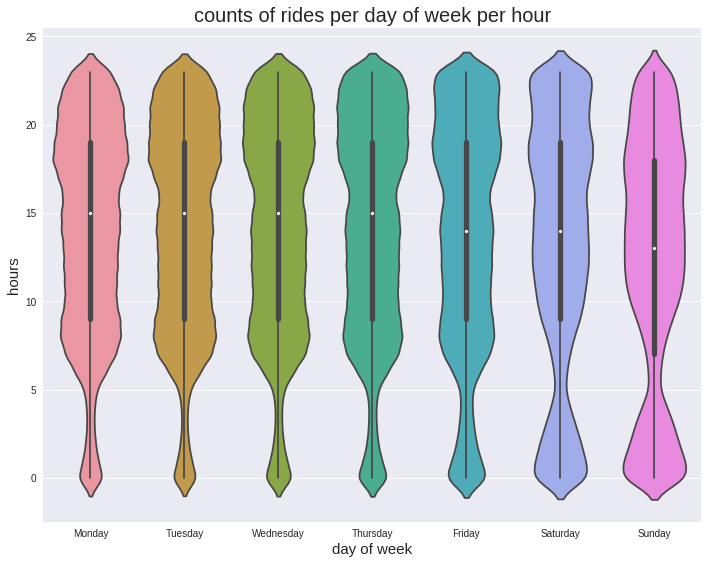

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax=sns.violinplot(x='day_of_week', y='hour',data=df_taxi_train)
plt.xlabel("day of week",fontsize=15)
plt.ylabel("hours",fontsize=15)
plt.title("counts of rides per day of week per hour",fontsize=20)
ax.set_xticklabels(days_of_week)
plt.tight_layout();

In [16]:
df_taxi_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,week_of_year,day_of_month,day_of_week,hour,week_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,11,14,0,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,23,12,6,0,144
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,3,19,1,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,14,6,2,19,67
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,12,26,5,13,133
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1,4,30,5,22,142
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,6,24,17,4,22,118
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5,20,21,5,7,127
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,5,21,27,4,23,119
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,3,10,10,3,21,93


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5, 1.0, 'vendor_id and duration of rides')

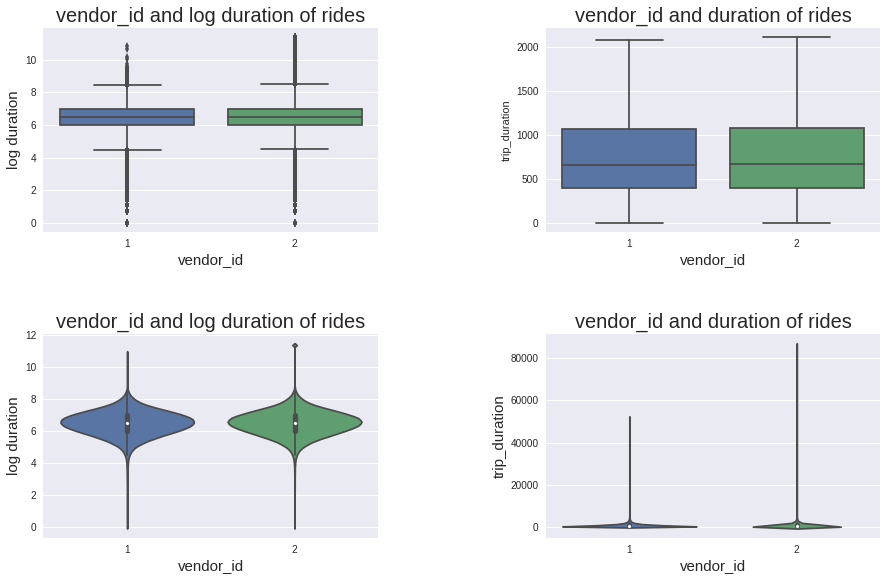

In [17]:
#see if vendor_id can be relevant to model
#it is not
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.add_subplot(3,2,1)
sns.boxplot(data=df_taxi_train, y=np.log(df_taxi_train["trip_duration"]),x="vendor_id")
plt.ylabel("log duration",fontsize=15)
plt.xlabel("vendor_id",fontsize=15)
plt.title("vendor_id and log duration of rides",fontsize=20)
fig.add_subplot(3,2,2)
sns.boxplot(data=df_taxi_train, y="trip_duration",x="vendor_id",showfliers=False)
plt.title("vendor_id and duration of rides",fontsize=20)
plt.xlabel("vendor_id",fontsize=15)
fig.add_subplot(3,2,3)
sns.violinplot(x='vendor_id', y=np.log(df_taxi_train["trip_duration"]),data=df_taxi_train)
plt.ylabel("log duration",fontsize=15)
plt.xlabel("vendor_id",fontsize=15)
plt.title("vendor_id and log duration of rides",fontsize=20)
fig.add_subplot(3,2,4)
sns.violinplot(x='vendor_id', y='trip_duration',data=df_taxi_train)
plt.ylabel("trip_duration",fontsize=15)
plt.xlabel("vendor_id",fontsize=15)
plt.title("vendor_id and duration of rides",fontsize=20)

In [18]:
#clean collisions data
df_collisions['TIME'] = pd.to_datetime(df_collisions['DATETIME']).dt.hour
df_collisions['DATE'] = pd.to_datetime(df_collisions['DATETIME']).dt.date
df_collisions = df_collisions.dropna(subset=['LATITUDE', 'LONGITUDE'])
#filter data only for NYC
df_collisions = df_collisions[df_collisions['LATITUDE'] <= 40.85]
df_collisions = df_collisions[df_collisions['LATITUDE'] >= 40.63]
df_collisions = df_collisions[df_collisions['LONGITUDE'] <= -73.65]
df_collisions = df_collisions[df_collisions['LONGITUDE'] >= -74.03]
df_collisions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67177 entries, 3363795 to 3474469
Data columns (total 29 columns):
DATETIME                         67177 non-null datetime64[ns]
BOROUGH                          52547 non-null object
ZIP CODE                         52530 non-null float64
LATITUDE                         67177 non-null float64
LONGITUDE                        67177 non-null float64
LOCATION                         67177 non-null object
ON STREET NAME                   50334 non-null object
CROSS STREET NAME                42889 non-null object
OFF STREET NAME                  14207 non-null object
NUMBER OF PERSONS INJURED        67176 non-null float64
NUMBER OF PERSONS KILLED         67176 non-null float64
NUMBER OF PEDESTRIANS INJURED    67177 non-null int64
NUMBER OF PEDESTRIANS KILLED     67177 non-null int64
NUMBER OF CYCLIST INJURED        67177 non-null int64
NUMBER OF CYCLIST KILLED         67177 non-null int64
NUMBER OF MOTORIST INJURED       67177 non-null i

In [0]:
#combine fatality and injury into severity column
df_collisions['SEVERITY'] = df_collisions.filter(regex=r'NUMBER OF *').sum(axis=1)
df_collisions['FATALITY'] = df_collisions.filter(regex=r'KILLED').sum(axis=1)
df_collisions['INJURY'] = df_collisions.filter(regex=r'INJURED').sum(axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


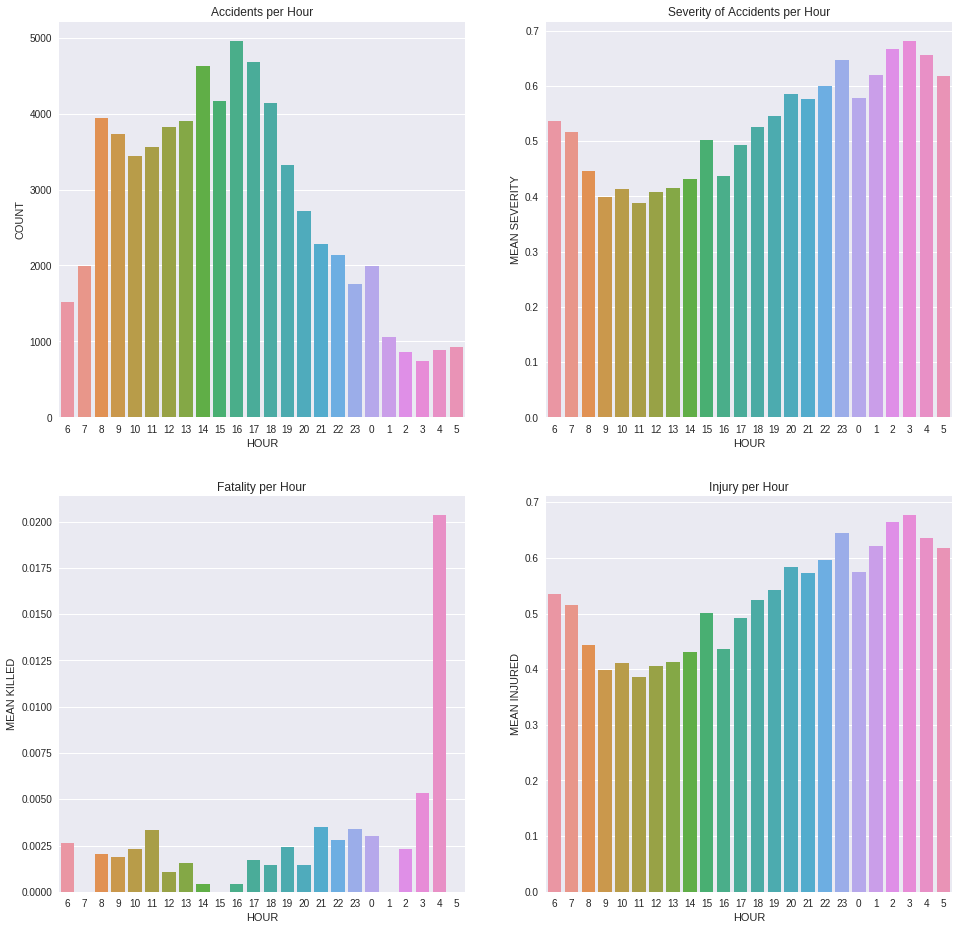

In [20]:
#graphical plots accidents/severity/injury/fatality for per hour 
fig, axes = plt.subplots(2, 2, figsize=(16,16))
order = np.roll(np.arange(24), -6)
ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]

collisions_count = df_collisions.groupby('TIME').count()
collisions_count = collisions_count.reset_index()
sns.barplot(x='TIME', y='SEVERITY', data=collisions_count, order=order, ax=ax1)
ax1.set_title("Accidents per Hour")
ax1.set_xlabel("HOUR")
ax1.set_ylabel('COUNT')


collisions_mean = df_collisions.groupby('TIME').mean()
collisions_mean = collisions_mean.reset_index()
sns.barplot(x='TIME', y='SEVERITY', data=collisions_mean, order=order, ax=ax2)
ax2.set_title("Severity of Accidents per Hour")
ax2.set_xlabel("HOUR")
ax2.set_ylabel('MEAN SEVERITY')

fatality_count = df_collisions.groupby('TIME').mean()
fatality_count = fatality_count.reset_index()
sns.barplot(x='TIME', y='FATALITY', data=fatality_count, order=order, ax=ax3)
ax3.set_title("Fatality per Hour")
ax3.set_xlabel("HOUR")
ax3.set_ylabel('MEAN KILLED')

injury_count = df_collisions.groupby('TIME').mean()
injury_count = injury_count.reset_index()
sns.barplot(x='TIME', y='INJURY', data=injury_count, order=order, ax=ax4)
ax4.set_title("Injury per Hour")
ax4.set_xlabel("HOUR")
ax4.set_ylabel('MEAN INJURED')

plt.show();

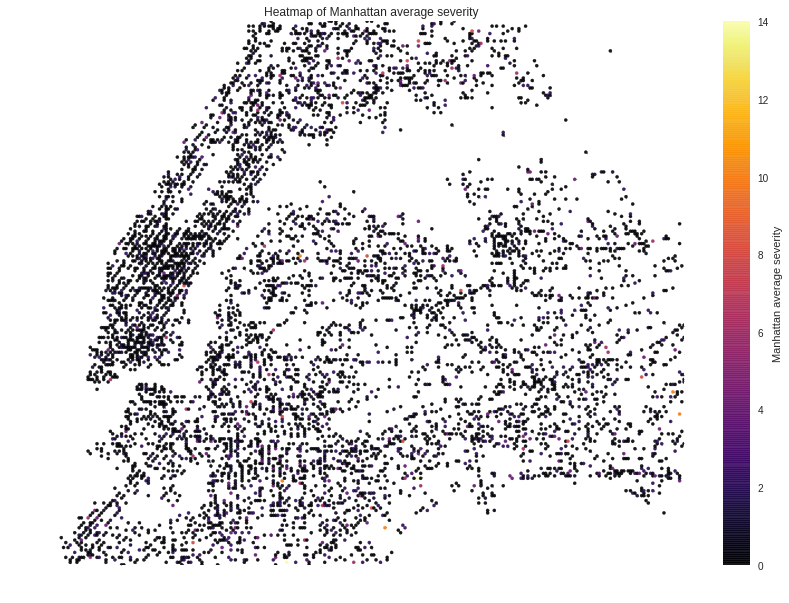

In [21]:
N = 10000
sample = df_collisions.sample(N)

# Round / bin the latitude and longitudes
sample['lat_bin'] = np.round(sample['LATITUDE'], 3)
sample['lng_bin'] = np.round(sample['LONGITUDE'], 3)

# Average severity for regions
gby_cols = ['lat_bin', 'lng_bin']

coord_stats = (sample.groupby(gby_cols)
               .agg({'SEVERITY': 'mean'})
               .reset_index())

# Visualize the average severity per region
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))

scatter_trips = ax.scatter(sample['LONGITUDE'].values,
                           sample['LATITUDE'].values,
                           color='grey', s=1, alpha=0.5)

scatter_cmap = ax.scatter(coord_stats['lng_bin'].values,
                          coord_stats['lat_bin'].values,
                          c=coord_stats['SEVERITY'].values,
                          cmap='inferno', s=10, alpha=0.9)

cbar = fig.colorbar(scatter_cmap)
cbar.set_label("Manhattan average severity")
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Heatmap of Manhattan average severity')
plt.axis('off');



In [0]:
#!pip install geopandas
#!apt-get -qq install python-cartopy python3-cartopy
#!pip install geoplot

In [0]:

#import geopandas

#shape = '/content/gdrive/My Drive/BDAProj/shape/taxi_zones.shp'
#df_shape = gpd.read_file(shape)
#merged = df_shape.set_index('borough').join(df_collisions.set_index('BOROUGH'))

# set a variable that will call whatever column we want to visualize on the map
#variable = 'SEVERITY'
# set the range for the choropleth
#vmin, vmax = 120, 220
# create figure and axes for Matplotlib
#fig, ax = plt.subplots(1, figsize=(10, 6))
#merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor=’0.8')


In [0]:
#add start and end time for collisions, assume that an accident will influence traffic in the surrounding area for around 1 hour
df_collisions['START'] = df_collisions['DATETIME']
df_collisions['END'] = df_collisions['START'] + pd.Timedelta(hours=1)

In [24]:
#subset collision data to combine with train data
df_collisions_subset = df_collisions[["DATETIME", "TIME", "START", "END", "DATE", "LATITUDE", "LONGITUDE", "SEVERITY"]]
df_collisions_subset.head(5)

,DATETIME,TIME,START,END,DATE,LATITUDE,LONGITUDE,SEVERITY
UNIQUE KEY,,,,,,,,
3363795,2016-01-01 09:45:00,9,2016-01-01 09:45:00,2016-01-01 10:45:00,2016-01-01,40.650277,-74.011747,0.0
3363804,2016-01-01 09:45:00,9,2016-01-01 09:45:00,2016-01-01 10:45:00,2016-01-01,40.661835,-73.893105,0.0
3363823,2016-01-01 09:42:00,9,2016-01-01 09:42:00,2016-01-01 10:42:00,2016-01-01,40.676131,-73.921901,0.0
3363951,2016-01-01 09:40:00,9,2016-01-01 09:40:00,2016-01-01 10:40:00,2016-01-01,40.761408,-73.803845,0.0
3363806,2016-01-01 09:33:00,9,2016-01-01 09:33:00,2016-01-01 10:33:00,2016-01-01,40.657591,-73.883492,0.0


In [0]:
#getting read combine data
df_taxi_train = df_taxi_train.reset_index() 
df_taxi_train = df_taxi_train[['index', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'trip_duration']]
df_taxi_train['date'] = df_taxi_train['pickup_datetime'].dt.date

In [0]:
#only look at one week of data because of memory limitations 
df_collisions_subset = df_collisions_subset[df_collisions_subset['DATETIME'].dt.weekofyear == 4]
df_taxi_train = df_taxi_train[df_taxi_train['pickup_datetime'].dt.weekofyear == 4]

In [0]:
#merge data, merged table will have multiple rows for every taxi ride row
df_merged = pd.merge(df_taxi_train, df_collisions_subset, how='left', left_on="date",right_on="DATE")

In [28]:
df_merged.head()

,index,pickup_datetime,pickup_longitude,pickup_latitude,trip_duration,date,DATETIME,TIME,START,END,DATE,LATITUDE,LONGITUDE,SEVERITY
0,5,2016-01-30 22:01:40,-73.982857,40.742195,443,2016-01-30,2016-01-30 08:50:00,8,2016-01-30 08:50:00,2016-01-30 09:50:00,2016-01-30,40.784537,-73.973596,0.0
1,5,2016-01-30 22:01:40,-73.982857,40.742195,443,2016-01-30,2016-01-30 08:50:00,8,2016-01-30 08:50:00,2016-01-30 09:50:00,2016-01-30,40.756764,-73.967153,0.0
2,5,2016-01-30 22:01:40,-73.982857,40.742195,443,2016-01-30,2016-01-30 08:40:00,8,2016-01-30 08:40:00,2016-01-30 09:40:00,2016-01-30,40.783722,-73.808628,0.0
3,5,2016-01-30 22:01:40,-73.982857,40.742195,443,2016-01-30,2016-01-30 08:40:00,8,2016-01-30 08:40:00,2016-01-30 09:40:00,2016-01-30,40.632660,-73.959894,0.0
4,5,2016-01-30 22:01:40,-73.982857,40.742195,443,2016-01-30,2016-01-30 08:30:00,8,2016-01-30 08:30:00,2016-01-30 09:30:00,2016-01-30,40.742731,-73.914985,0.0


In [0]:
#haversince distance formula
def haversine(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    average_earth_radius = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * average_earth_radius * np.arcsin(np.sqrt(d))
    return h

#manhattan distance formula
def manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine(lat1, lng1, lat1, lng2)
    b = haversine(lat1, lng1, lat2, lng1)
    return a + b

In [0]:
#accidents only influence the duration of a taxi ride if the following are satisfied
#the haversine distance between the the pickup location of the taxi ride and location of the recorded accident is within 5 (km).
#the start time of a taxi ride is within a 1 hour interval between the start and end of an accident.

start_to_accident = haversine(df_merged['pickup_latitude'].values,
                              df_merged['pickup_longitude'].values,
                              df_merged['LATITUDE'].values,
                              df_merged['LONGITUDE'].values)
df_merged['start_to_accident'] = start_to_accident

#initialze accident_close column to all 0 first
df_merged['accident_close'] = 0

# Boolean pd.Series to select the indices for which accident_close should equal 1:
# (1) record's start_to_accident <= 5 
# (2) pick up time is between start and end
 
is_accident_close = (df_merged['START']<=df_merged['pickup_datetime']) & (df_merged['pickup_datetime']<=df_merged['END']) & (df_merged['start_to_accident']<=5)

df_merged.loc[is_accident_close, 'accident_close'] = 1

In [0]:
df_taxi_train = df_taxi_train.set_index('index')
num_accidents = df_merged.groupby(['index'])['accident_close'].sum().to_frame()
train_accidents = df_taxi_train.copy()
train_accidents['num_accidents'] = num_accidents

In [32]:
train_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54232 entries, 5 to 1458625
Data columns (total 6 columns):
pickup_datetime     54232 non-null datetime64[ns]
pickup_longitude    54232 non-null float64
pickup_latitude     54232 non-null float64
trip_duration       54232 non-null int64
date                54232 non-null object
num_accidents       54232 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.9+ MB


In [33]:
train_accidents.head()

,pickup_datetime,pickup_longitude,pickup_latitude,trip_duration,date,num_accidents
index,,,,,,
5,2016-01-30 22:01:40,-73.982857,40.742195,443,2016-01-30,3
88,2016-01-28 11:25:20,-73.968826,40.754196,336,2016-01-28,7
105,2016-01-27 08:07:32,-73.956039,40.767609,989,2016-01-27,3
113,2016-01-26 23:40:14,-74.006798,40.706074,505,2016-01-26,1
114,2016-01-30 15:15:47,-73.977272,40.757351,900,2016-01-30,8


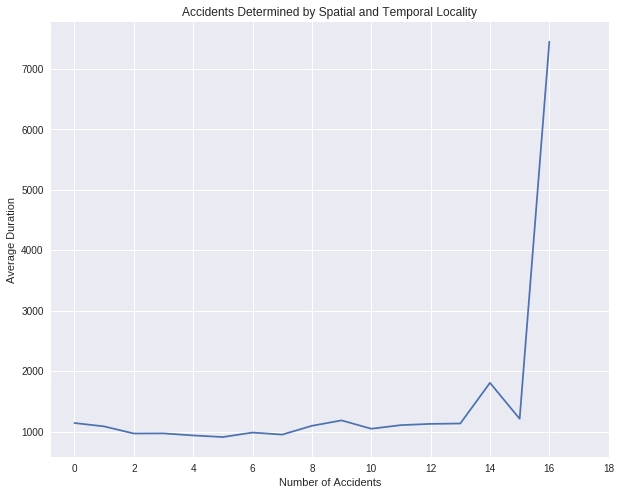

In [34]:
plt.figure(figsize=(10,8))
train_accidents.groupby('num_accidents')['trip_duration'].mean().plot(xticks=np.arange(0, 20, 2))
plt.title("Accidents Determined by Spatial and Temporal Locality")
plt.xlabel("Number of Accidents")
plt.ylabel("Average Duration")
plt.show();

In [0]:
#linear regression model for train_accidents
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


def select_columns(data, *columns):
    return data.loc[:, columns]

def process_data_gm1(data, test=False):
    X = (
        data
        .pipe(add_time_columns)
        .pipe(select_columns,        
              'pickup_longitude',  
              'pickup_latitude',   
              'month',
              'week_of_year',
              'day_of_month',
              'day_of_week',
              'hour',
              'week_hour',
              'num_accidents',
             )
    )
    if test:
        y = None
    else:
        y = data['trip_duration']
        
    return X, y

train_df, val_df = train_test_split(train_accidents, test_size=0.2, random_state=42)

# Train
X_train, y_train = process_data_gm1(train_df)
X_val, y_val = process_data_gm1(val_df)
model1 = lm.LinearRegression(fit_intercept=True)
model1.fit(X_train, y_train)

# Predict
y_train_pred = model1.predict(X_train)
y_val_pred = model1.predict(X_val)


In [36]:
#r2 value
r2_score(y_val, y_val_pred)

0.006050254978392622

In [0]:
#reload original data files
df_taxi_train2 = pd.read_csv('/content/gdrive/My Drive/BDAProj/train.csv')
df_taxi_test2 = pd.read_csv('/content/gdrive/My Drive/BDAProj/test.csv')

In [0]:
#remove rows with no passengers
df_taxi_train2 = df_taxi_train2.loc[df_taxi_train2['passenger_count'] != 0]
df_taxi_test2 = df_taxi_test2.loc[df_taxi_test2['passenger_count'] != 0]
#remove rows with durations more than 8000 seconds
df_taxi_train2 = df_taxi_train2.loc[df_taxi_train2['trip_duration'] <= 8000]
#change to datetime object
df_taxi_train2['pickup_datetime'] = pd.to_datetime(df_taxi_train2['pickup_datetime'])
df_taxi_train['dropoff_datetime'] = pd.to_datetime(df_taxi_train2['dropoff_datetime'])
df_taxi_test2['pickup_datetime'] = pd.to_datetime(df_taxi_test2['pickup_datetime'])

In [0]:
def add_distance_columns(df):
    df.is_copy = False
    df.loc[:, 'manhattan'] = manhattan_distance(lat1=df['pickup_latitude'],
                                                lng1=df['pickup_longitude'],
                                                lat2=df['dropoff_latitude'],
                                                lng2=df['dropoff_longitude'])
    df.loc[:, 'haversine'] = haversine(lat1=df['pickup_latitude'],
                                       lng1=df['pickup_longitude'],
                                       lat2=df['dropoff_latitude'],
                                       lng2=df['dropoff_longitude'])
    return df

def process_data_gm2(data, test=False):
    X = (
        data
        
        # Transform data
        .pipe(add_time_columns)
        .pipe(add_distance_columns)
        .pipe(select_columns,        
              'pickup_longitude',  
              'pickup_latitude',   
              'dropoff_longitude', 
              'dropoff_latitude',
              'month',
              'week_of_year',
              'day_of_month',
              'day_of_week',
              'hour',
              'week_hour',
              'manhattan',
              'haversine',
             )
    )
    if test:
        y = None
    else:
        y = data['trip_duration']
        
    return X, y

In [0]:
#linear model with original data with seleted columns

train_df2, val_df2 = train_test_split(df_taxi_train2, test_size=0.2, random_state=42)

# Train
X_train2, y_train2 = process_data_gm2(train_df2)
X_val2, y_val2 = process_data_gm2(val_df2)
guided_model_2 = lm.LinearRegression(fit_intercept=True)
guided_model_2.fit(X_train2, y_train2)

# Predict
y_train_pred2 = guided_model_2.predict(X_train2)
y_val_pred2 = guided_model_2.predict(X_val2)

In [0]:
def mae(actual, predicted):
    """
    Calculates MAE from actual and predicted values
    Input:
      actual (1D array-like): vector of actual values
      predicted (1D array-like): vector of predicted/fitted values
    Output:
      a float, the MAE
    """
    
    mae = np.mean(np.abs(actual - predicted))
    return mae

In [44]:
print("Validation Error: ", mae(y_val_pred2, y_val2))

Validation Error:  294.95285383282766


In [45]:
r2_score(y_val2, y_val_pred2)

0.4811124067738549